In [1]:
"""
This code belongs to the paper:
-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)
   MAntRA: A framework for model agnostic reliability analysis
   
-- This code is for 21 Storey building.
"""

'\nThis code belongs to the paper:\n-- YC Mathpati, KS More, T Tripura, R Nayek, S Chakraborty (2023)\n   MAntRA: A framework for model agnostic reliability analysis\n   \n-- This code is for 21 Storey building.\n'

# Drift 21 Equation discovery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
#     # for the signum or sign operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(np.sign(xt[i,:]))+0.0001
#         D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
            
    ind = len(D[0])
    
    return D, ind

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
  
        y1.append(x[-1,:])     # Displacement
        y2.append(x[-2,:])      
        y3.append(x[-3,:])     # Displacement
        y4.append(x[-4,:])
        y5.append(x[-5,:])
        y6.append(x[-6,:])
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        

        zint1 = x[-1,0:-1]
        xfinal1 = x[-1,1:] 
        xmz1 = (xfinal1 - zint1)
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 

    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)

    time = t[0:-1]
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, y7, y8, time

In [3]:
T = 1
dof = 21
x_initial = np.zeros(2*dof)
x_initial[0]=0.5
x_initial[2]=0.48
x_initial[4]=0.45999999999999996
x_initial[6]=0.43999999999999995
x_initial[8]=0.41999999999999993
x_initial[10]=0.3999999999999999
x_initial[12]=0.3799999999999999
x_initial[14]=0.3599999999999999
x_initial[16]=0.33999999999999986
x_initial[18]=0.31999999999999984
x_initial[20]=0.2999999999999998
x_initial[22]=0.2799999999999998
x_initial[24]=0.2599999999999998
x_initial[26]=0.2399999999999998
x_initial[28]=0.2199999999999998
x_initial[30]=0.19999999999999982
x_initial[32]=0.17999999999999983
x_initial[34]=0.15999999999999984
x_initial[36]=0.13999999999999985
x_initial[38]=0.11999999999999984
x_initial[40]=0.0999999999999998

In [5]:
xdrift21, xdrift20, xdrift19, xdiff21, xdiff20, xdiff19, y42, y41, y40, y39, y38, y37, y36, y35, t_eval = M_DOF_sys(x_initial, dof, T)

In [7]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y42)):
    data = np.row_stack((y42[j,0:-1], y41[j,0:-1], y40[j,0:-1], y39[j,0:-1], y38[j,0:-1], y37[j,0:-1], y36[j,0:-1], y35[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [8]:
xdts = xdrift21
D = Dictionary

In [10]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [11]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[38.0],[39.0],[40.0],[70.0],[74.0]]), 'Value': matlab.double([[-2.006861900352611],[-3000.9351334302573],[1.955435869293901],[3001.6425152696575],[-0.0005316165550079704],[-0.06847279658601516],[0.007292289693904847],[0.003027369591636891],[-0.07048864628087845]])}


In [12]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    X = stats.zscore(X, ddof = 1)         
    X = np.c_[np.ones(len(X)),X]          
    y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        initz = np.hstack((1,initz0))   

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0)+1,1)) @ np.reshape(mu,(1,len(initz0)+1))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC



In [14]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4562.456899900581
Iteration = 1  log(Likelihood) = -4097.554681335244
Iteration = 2  log(Likelihood) = -4097.389324346219
Iteration = 3  log(Likelihood) = -4097.38872190441
Iteration = 4  log(Likelihood) = -4097.388718533621
{'zmean': array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-3.87635609e-13, -1.37524398e+01, -9.06835582e+02,  1.67673734e+01,
        8.77455982e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.

C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


-2.008719918607018
-3000.0396043907836
1.979772702759871
3000.5174409579395


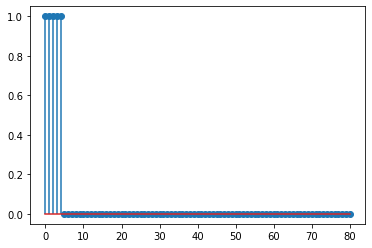

In [17]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

In [18]:
Zmean1 = DS['zmean'][1:]

<Figure size 432x288 with 0 Axes>

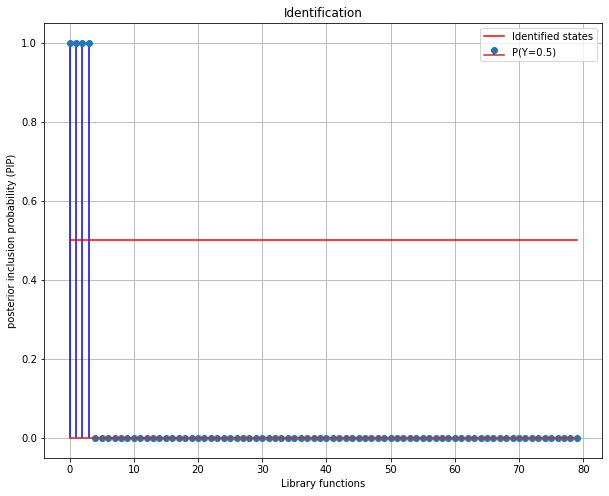

In [19]:
plt.figure(1)
plt.figure(figsize = (10, 8))
yr = 0.5*np.ones(nl-1)
xr = np.array(range(0,nl-1))
plt.stem(xr, Zmean1, use_line_collection = True, linefmt='blue')
plt.plot(xr, yr, 'r')
plt.legend(["Identified states", "P(Y=0.5)"])
plt.xlabel('Library functions'); 
plt.ylabel('posterior inclusion probability (PIP)');
plt.grid(True); plt.title('Identification')
plt.show()

In [20]:
(DS["wmean"][1:]) / (D_std)

array([-2.00871992e+00, -3.00003960e+03,  1.97977270e+00,  3.00051744e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

# Drift 20 Equation discovery

In [22]:
xdts = xdrift20

In [23]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[16.0],[18.0],[30.0],[38.0],[55.0],[59.0]]), 'Value': matlab.double([[1.9245637717452329],[3000.8756255134244],[-3.968401382928298],[-6000.382786531986],[2.0240253854757784],[3004.9160091095187],[0.05128842184176563],[0.005675534209267444],[0.11469637695506867],[-0.005034910611998336],[-0.03264839476929258],[-17.452703961090222]])}


In [24]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -5152.874428468634
Iteration = 1  log(Likelihood) = -4644.375633875511
Iteration = 2  log(Likelihood) = -4644.213406487754
Iteration = 3  log(Likelihood) = -4644.212812327566
Iteration = 4  log(Likelihood) = -4644.212809003674
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 1.95764153e-13,  1.38128475e+01,  9.06307310e+02, -3.38775082e+01,
       -1.75381473e+03,  1.32982065e+01,  8.11612603e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8644/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


2.0175432365137485
2998.2919462168093
-4.0000162401891055
-5997.282817187615
1.990635272720442
2998.9711918436124


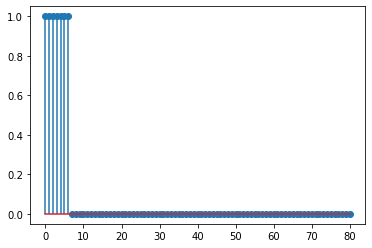

In [27]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

In [28]:
Zmean2 = DS['zmean'][1:]

<Figure size 432x288 with 0 Axes>

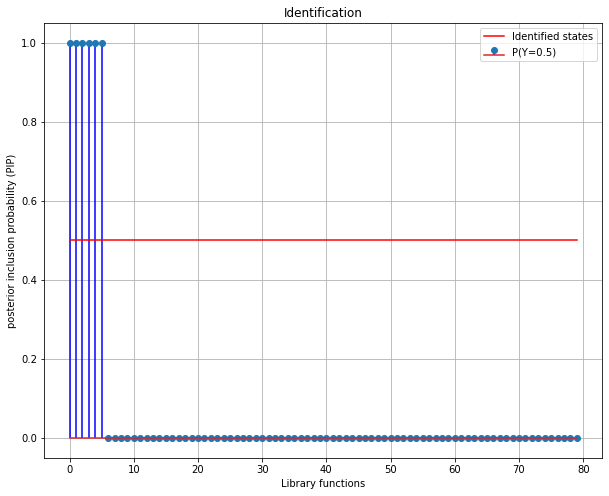

In [29]:
plt.figure(1)
plt.figure(figsize = (10, 8))
yr = 0.5*np.ones(nl-1)
xr = np.array(range(0,nl-1))
plt.stem(xr, Zmean2, use_line_collection = True, linefmt='blue')
plt.plot(xr, yr, 'r')
plt.legend(["Identified states", "P(Y=0.5)"])
plt.xlabel('Library functions'); 
plt.ylabel('posterior inclusion probability (PIP)');
plt.grid(True); plt.title('Identification')
plt.show()

# Drift 19

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    y9 = []
    y10 = []
    
    xz2 = []
    xz3 = []
    xz4 = []
    xz5 = []
    
    xzs22 = []
    xzs33 = []
    xzs44 = []
    xzs55 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y3.append(x[-3,:])
        y4.append(x[-4,:])
        y5.append(x[-5,:])     # Displacement
        y6.append(x[-6,:])
        y7.append(x[-7,:])     # Displacement
        y8.append(x[-8,:])
        y9.append(x[-9,:])
        y10.append(x[-10,:])
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
                  
        zint4 = x[-7, 0:-1]
        xfinal4 = x[-7, 1:] 
        xmz4 = (xfinal4 - zint4)
        
        zint5 = x[-9, 0:-1]
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        xz2.append(xmz2)
        xz3.append(xmz3)
        xz4.append(xmz4)
        xz5.append(xmz5)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
        xmzsq44 = np.multiply(xmz4, xmz4)
        xzs44.append(xmzsq44)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
    
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)
    xz4 = pow(dt,-1)*np.mean(np.array(xz4), axis = 0)
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)

    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 
    xzs44 = pow(dt,-1)*np.mean(np.array(xzs44), axis = 0)
    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)

    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)

    time = t[0:-1]
    return xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time

In [6]:
xz2, xz3, xz4, xz5, xzs22, xzs33, xzs44, xzs55, y3, y4, y5, y6, y7, y8, y9, y10, time = M_DOF_sys(x_initial, dof, T)

In [7]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y3)):
    data = np.row_stack((y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1], y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1]))
    Dtemp, nl = library(data, 3, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [35]:
xdts = xz3
D = Dictionary

In [36]:
D.shape

(1000, 237)

In [37]:
Dict = D.reshape(-1,order='F')
Dict.shape

(237000,)

In [38]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[18.0],[46.0],[50.0],[80.0],[85.0],[162.0],[191.0]]), 'Value': matlab.double([[1.971640776094826],[2999.918685044836],[-3.9860009321559873],[-6000.1639484509815],[2.021796951431441],[3000.132724500025],[0.3133885190078531],[6.858077895456735e-05],[-0.000334095019638349],[0.0037787034343005153],[0.08142730778621575],[-7.995527864155697e-05],[-0.059731277141923986]])}


In [39]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:143: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = inf
Iteration = 2  log(Likelihood) = inf


C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:151: RuntimeWarning: invalid value encountered in double_scalars
  cvg = LL[iter_] - LL[iter_-1]


Iteration = 3  log(Likelihood) = inf
Iteration = 4  log(Likelihood) = inf
Iteration = 5  log(Likelihood) = inf
Iteration = 6  log(Likelihood) = inf
Iteration = 7  log(Likelihood) = inf
Iteration = 8  log(Likelihood) = inf
Iteration = 9  log(Likelihood) = inf
Iteration = 10  log(Likelihood) = inf
Iteration = 11  log(Likelihood) = inf
Iteration = 12  log(Likelihood) = inf
Iteration = 13  log(Likelihood) = inf
Iteration = 14  log(Likelihood) = inf
Iteration = 15  log(Likelihood) = inf
Iteration = 16  log(Likelihood) = inf
Iteration = 17  log(Likelihood) = inf
Iteration = 18  log(Likelihood) = inf
Iteration = 19  log(Likelihood) = inf
Iteration = 20  log(Likelihood) = inf
Iteration = 21  log(Likelihood) = inf
Iteration = 22  log(Likelihood) = inf
Iteration = 23  log(Likelihood) = inf
Iteration = 24  log(Likelihood) = inf
Iteration = 25  log(Likelihood) = inf
Iteration = 26  log(Likelihood) = inf
Iteration = 27  log(Likelihood) = inf
Iteration = 28  log(Likelihood) = inf
Iteration = 29  log

1.996019659650603
2998.1820045623476
-3.987879225886737
-5995.060773070505
1.9985362835677112
2996.4584540504925


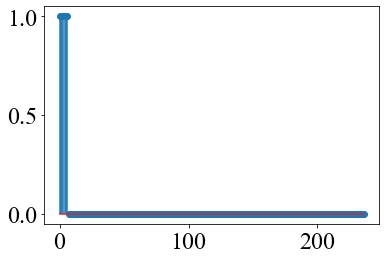

In [43]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

In [45]:
zmean19 = DS['zmean']
zmean19[0] = 0

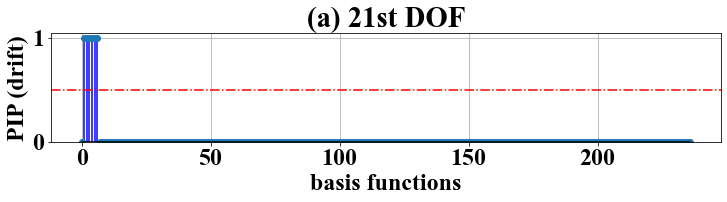

In [46]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(len(D[1,:])))
plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.xlabel('basis functions',fontweight='bold')
plt.ylabel('PIP (drift)', fontweight='bold');
plt.title('(a) 21st DOF', fontweight='bold')
plt.grid(True); plt.ylim(0,1.05)
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('MDOF_Drift.png',format='png',dpi=600,bbox_inches='tight')

# Drift 18

In [19]:
xdts = xz4

In [20]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[38.0],[43.0],[81.0],[114.0],[201.0],[205.0],[206.0],[212.0]]), 'Value': matlab.double([[2.014572147002297],[3000.554776174483],[-4.04529809559544],[-6000.372530724579],[2.034690306655402],[2999.8113049545354],[0.0002979398066879867],[-0.0008651734151512249],[-0.17074489356412223],[-8.567293421038287e-05],[1.8170870093626432],[-3.1776992804284796],[0.005053087582169389],[-0.0024869715050231276]])}


In [21]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:143: RuntimeWarning: divide by zero encountered in log
  + 0.5*np.log(la.det(Sigma))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))


Iteration = 0  log(Likelihood) = -inf


C:\Users\USER\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


Iteration = 1  log(Likelihood) = inf
Iteration = 2  log(Likelihood) = inf


C:\Users\USER\AppData\Local\Temp/ipykernel_12500/3344165784.py:151: RuntimeWarning: invalid value encountered in double_scalars
  cvg = LL[iter_] - LL[iter_-1]


Iteration = 3  log(Likelihood) = inf
Iteration = 4  log(Likelihood) = inf
Iteration = 5  log(Likelihood) = inf
Iteration = 6  log(Likelihood) = inf
Iteration = 7  log(Likelihood) = inf
Iteration = 8  log(Likelihood) = inf
Iteration = 9  log(Likelihood) = inf
Iteration = 10  log(Likelihood) = inf
Iteration = 11  log(Likelihood) = inf
Iteration = 12  log(Likelihood) = inf
Iteration = 13  log(Likelihood) = inf
Iteration = 14  log(Likelihood) = inf
Iteration = 15  log(Likelihood) = inf
Iteration = 16  log(Likelihood) = inf
Iteration = 17  log(Likelihood) = inf
Iteration = 18  log(Likelihood) = inf
Iteration = 19  log(Likelihood) = inf
Iteration = 20  log(Likelihood) = inf
Iteration = 21  log(Likelihood) = inf
Iteration = 22  log(Likelihood) = inf
Iteration = 23  log(Likelihood) = inf
Iteration = 24  log(Likelihood) = inf
Iteration = 25  log(Likelihood) = inf
Iteration = 26  log(Likelihood) = inf
Iteration = 27  log(Likelihood) = inf
Iteration = 28  log(Likelihood) = inf
Iteration = 29  log

1.9923740734765514
2996.245771840961
-4.003049477280969
-5992.0037657290295
2.0103310724543872
2995.17468795253


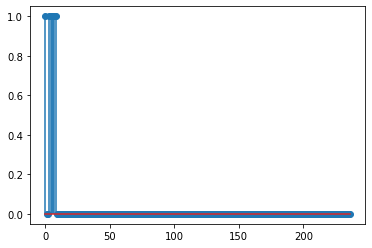

In [23]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 17

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run
    
    y7 = [] 
    y8 = []
    y9 = []
    y10 = []
    y11 = []
    y12 = []
    y13 = []
    y14 = []
    
    xz5 = []
    xz6 = []
    
    xzs55 = []
    xzs66 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y7.append(x[-7,:])
        y8.append(x[-8,:])
        y9.append(x[-9,:])         # Displacement
        y10.append(x[-10,:])
        y11.append(x[-11,:])       # Displacement
        y12.append(x[-12,:])
        y13.append(x[-13,:])
        y14.append(x[-14,:])
        
        zint5 = x[-9, 0:-1]        # Velocity
        xfinal5 = x[-9, 1:] 
        xmz5 = (xfinal5 - zint5)
        
        zint6 = x[-11, 0:-1]       # Velocity
        xfinal6 = x[-11, 1:] 
        xmz6 = (xfinal6 - zint6) 

        xz5.append(xmz5)
        xz6.append(xmz6)
        
        xmzsq55 = np.multiply(xmz5, xmz5)
        xzs55.append(xmzsq55)
        
        xmzsq66 = np.multiply(xmz6, xmz6)
        xzs66.append(xmzsq66)
        
    xz5 = pow(dt,-1)*np.mean(np.array(xz5), axis = 0)
    xz6 = pow(dt,-1)*np.mean(np.array(xz6), axis = 0)

    xzs55 = pow(dt,-1)*np.mean(np.array(xzs55), axis = 0)
    xzs66 = pow(dt,-1)*np.mean(np.array(xzs66), axis = 0)
    
    y7 = np.array(y7)
    y8 = np.array(y8)
    y9 = np.array(y9)
    y10 = np.array(y10)
    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)

    time = t[0:-1]
    return xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time

In [4]:
xz5, xz6, xzs55, xzs66, y7, y8, y9, y10, y11, y12, y13, y14, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y7)):
    data = np.row_stack((y7[j,0:-1], y8[j,0:-1], y9[j,0:-1], y10[j,0:-1], y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [6]:
xdts = xz5
D = Dictionary

In [7]:
D.shape

(1000, 81)

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[12.0],[21.0],[36.0],[41.0],[50.0],[52.0],[53.0],[65.0],[66.0]]), 'Value': matlab.double([[2.033539056894764],[2999.7610656679744],[-4.079755126590854],[-5998.3708531638395],[1.932399667958241],[2998.517851294281],[0.011670210662141451],[-0.1813449179949145],[0.005923346242016202],[0.1963554969074322],[0.0048477019934828535],[0.006493435935558107],[-0.08711009774904108],[2.323518863932262],[0.0041219194407023626]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -5019.827382372997
Iteration = 1  log(Likelihood) = -4510.9359188619455
Iteration = 2  log(Likelihood) = -4510.740488306293
Iteration = 3  log(Likelihood) = -4510.739878185557
Iteration = 4  log(Likelihood) = -4510.739874774026
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-4.49744049e-13,  1.24692428e+01,  7.84184981e+02, -2.94998932e+01,
       -1.52496956e+03,  1.43999194e+01,  7.27185706e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  

C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9903495270787748
2998.0981101181233
-3.994933600084622
-5996.061077113376
1.9677395409015634
2998.1635345032882


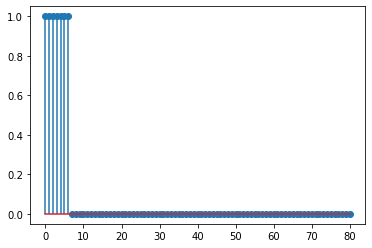

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 16

In [16]:
xdts = xz6

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[26.0],[39.0],[45.0],[49.0],[52.0],[55.0],[62.0],[68.0],[80.0],[81.0]]), 'Value': matlab.double([[2.0959426456424293],[2999.727793293233],[-4.001442517484647],[-6000.556072408731],[1.9939201811075118],[3001.6187038378876],[0.19320196714360427],[-0.31267773839639046],[-4.337310720837925],[9.605594164044993],[0.005572047928262358],[-0.30480826975027725],[-0.19026772358491065],[0.0028879369199329217],[0.1589724888648828],[-8.043439561294013]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1.]


In [19]:

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4979.305602728157
Iteration = 1  log(Likelihood) = -4471.577864693602
Iteration = 2  log(Likelihood) = -4471.363628920546

C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_3212/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))



Iteration = 3  log(Likelihood) = -4471.362998487623
Iteration = 4  log(Likelihood) = -4471.36299496094
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 6.17221369e-13,  0.00000000e+00,  0.00000000e+00,  1.49050050e+01,
        7.62651468e+02, -2.93679754e+01, -1.45508808e+03,  1.29565631e+01,
        7.12705632e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000

2.0184651208568294
2998.6859393507852
-4.013114574041832
-5999.281885073903
2.0082113462257722
3000.7909039506276


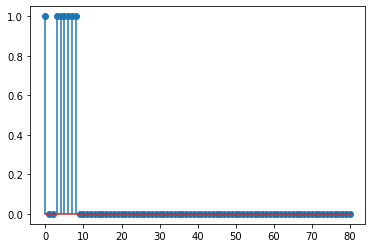

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y11 = []  
    y12 = []
    y13 = []
    y14 = []
    y15 = []
    y16 = []
    y17 = []
    y18 = []
    
    xz7 = []
    xz8 = []
    
    xzs77 = []
    xzs88 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y11.append(x[-11,:])       
        y12.append(x[-12,:])
        y13.append(x[-13,:])       # Displacement
        y14.append(x[-14,:])
        y15.append(x[-15,:])       # Displacement     
        y16.append(x[-16,:])
        y17.append(x[-17,:])       
        y18.append(x[-18,:])

        
        zint7 = x[-13, 0:-1]        # Velocity
        xfinal7 = x[-13, 1:] 
        xmz7 = (xfinal7 - zint7)
        
        zint8 = x[-15, 0:-1]       # Velocity
        xfinal8 = x[-15, 1:] 
        xmz8 = (xfinal8 - zint8) 

        xz7.append(xmz7)
        xz8.append(xmz8)
        
        xmzsq77 = np.multiply(xmz7, xmz7)
        xzs77.append(xmzsq77)
        
        xmzsq88 = np.multiply(xmz8, xmz8)
        xzs88.append(xmzsq88)
        
    xz7 = pow(dt,-1)*np.mean(np.array(xz7), axis = 0)
    xz8 = pow(dt,-1)*np.mean(np.array(xz8), axis = 0)

    xzs77 = pow(dt,-1)*np.mean(np.array(xzs77), axis = 0)
    xzs88 = pow(dt,-1)*np.mean(np.array(xzs88), axis = 0)

    y11 = np.array(y11)
    y12 = np.array(y12)
    y13 = np.array(y13)
    y14 = np.array(y14)
    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)

    time = t[0:-1]
    return xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time

In [4]:
xz7, xz8, xzs77, xzs88, y11, y12, y13, y14, y15, y16, y17, y18, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y11)):
    data = np.row_stack((y11[j,0:-1], y12[j,0:-1], y13[j,0:-1], y14[j,0:-1], y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [6]:
xdts = xz7
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[12.0],[20.0],[23.0],[32.0],[34.0],[35.0],[38.0],[50.0],[52.0],[54.0],[68.0]]), 'Value': matlab.double([[2.0119161447653378],[2999.5218143027996],[-4.045074900803292],[-5998.974325555198],[2.019304002825955],[2999.563784165592],[-0.0099578613427715],[-0.0035523699701256483],[0.10576976769402993],[0.00018481147644458417],[-0.004270842585944765],[0.09997319701360295],[0.003947289235378657],[-0.0050291825880500185],[0.004327021558095369],[0.0018012634243125376],[-0.003002936464725685]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4952.26162986835
Iteration = 1  log(Likelihood) = -4441.507241947149
Iteration = 2  log(Likelihood) = -4441.30505450573
Iteration = 3  log(Likelihood) = -4441.30443235092
Iteration = 4  log(Likelihood) = -4441.304428870647
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 7.45785679e-13,  1.48937427e+01,  7.23774772e+02, -2.58671050e+01,
       -1.41567394e+03,  1.31630144e+01,  6.93919893e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00

C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


In [13]:
DS["wmean"][1:] / (D_std).reshape(-1)

array([ 2.03158323e+00,  2.99814309e+03, -4.01255471e+00, -5.99589151e+03,
        2.03481198e+00,  2.99739619e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

2.0315832268965677
2998.1430900690357
-4.0125547137838815
-5995.891507106089
2.0348119808240726
2997.396188667701


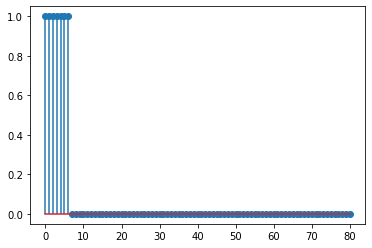

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 14

In [16]:
xdts = xz8

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[29.0],[50.0],[51.0],[54.0],[57.0]]), 'Value': matlab.double([[1.980751640968397],[2998.8798008168383],[-3.9610543953859305],[-5998.324297335633],[1.9975962216490741],[2998.976928482143],[0.24899280109261632],[-0.0008982186989087167],[0.16037377146339757],[-0.003134036228409543],[-0.08658227548812239]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# D_std = np.std(D[:,1:],axis = 0)
# D_std1 = D_std.reshape(1,-1)
# D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4912.597127069141
Iteration = 1  log(Likelihood) = -4426.503416846992
Iteration = 2  log(Likelihood) = -4426.326206143134
Iteration = 3  log(Likelihood) = -4426.325595461144
Iteration = 4  log(Likelihood) = -4426.325592045258
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-9.08055618e-13,  0.00000000e+00,  0.00000000e+00,  1.28015848e+01,
        7.07556805e+02, -2.57692204e+01, -1.38783122e+03,  1.38160664e+01,
        6.94600318e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8352/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9858062831074283
2996.759148055798
-3.9835494379162357
-5994.755364268647
2.0080597987567144
2997.543372325106


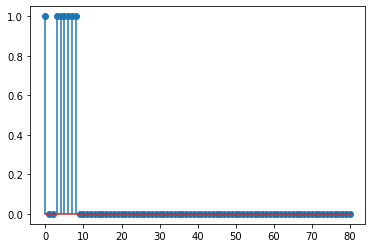

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 13

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y15 = []
    y16 = []
    y17 = []
    y18 = []
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    
    xz9 = []
    xz10 = []
    
    xzs9 = []
    xzs10 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y15.append(x[-15,:])           
        y16.append(x[-16,:])
        y17.append(x[-17,:])       # Displacement 
        y18.append(x[-18,:])
        y19.append(x[-19,:])       # Displacement         
        y20.append(x[-20,:])
        y21.append(x[-21,:])           
        y22.append(x[-22,:])

        
        zint9 = x[-17, 0:-1]        # Velocity
        xfinal9 = x[-17, 1:] 
        xmz9 = (xfinal9 - zint9)
        
        zint10 = x[-19, 0:-1]       # Velocity
        xfinal10 = x[-19, 1:] 
        xmz10 = (xfinal10 - zint10) 

        xz9.append(xmz9)
        xz10.append(xmz10)
        
        xmzsq9 = np.multiply(xmz9, xmz9)
        xzs9.append(xmzsq9)
        
        xmzsq10 = np.multiply(xmz10, xmz10)
        xzs10.append(xmzsq10)
        
    xz9 = pow(dt,-1)*np.mean(np.array(xz9), axis = 0)
    xz10 = pow(dt,-1)*np.mean(np.array(xz10), axis = 0)

    xzs9 = pow(dt,-1)*np.mean(np.array(xzs9), axis = 0)
    xzs10 = pow(dt,-1)*np.mean(np.array(xzs10), axis = 0)

    y15 = np.array(y15)
    y16 = np.array(y16)
    y17 = np.array(y17)
    y18 = np.array(y18)
    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)

    time = t[0:-1]
    return xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time

In [4]:
xz9, xz10, xzs9, xzs10, y15, y16, y17, y18, y19, y20, y21, y22, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y15)):
    data = np.row_stack((y15[j,0:-1], y16[j,0:-1], y17[j,0:-1], y18[j,0:-1], y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], ))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)
# xdts = xdrift1

In [6]:
xdts = xz9
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[33.0],[39.0],[48.0],[52.0],[76.0]]), 'Value': matlab.double([[1.9734836994073524],[2999.8463065383085],[-3.9482023091871885],[-5999.718297830694],[1.9856934802159232],[2999.050306674468],[-1.9453667493292295],[-0.11333342585582594],[0.13947021908553844],[0.0003328719689753488],[0.1647827993262003]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4919.607510002008
Iteration = 1  log(Likelihood) = -4431.253725135763
Iteration = 2  log(Likelihood) = -4431.0908344448735
Iteration = 3  log(Likelihood) = -4431.090235459761
Iteration = 4  log(Likelihood) = -4431.090232108776
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 5.06582230e-13,  1.28307235e+01,  6.98755914e+02, -2.71723538e+01,
       -1.39722019e+03,  1.34828823e+01,  7.10087959e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  

C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.979841912935129
2997.5049710046123
-3.97780877166546
-5996.012284491217
1.9838493670140263
2998.373479074605


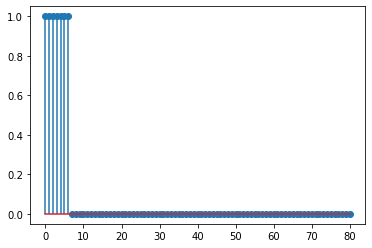

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 12

In [16]:
xdts = xz10

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[16.0],[22.0],[36.0],[46.0],[60.0],[65.0],[80.0]]), 'Value': matlab.double([[2.0447564233003543],[2999.2185265151347],[-4.009745156494036],[-5999.05206876477],[1.9953511288090697],[3001.280739132953],[-0.055632853803769616],[-0.0023030094599451835],[-0.007147257590661628],[0.059999827987747986],[-0.1854389433133679],[2.468057429854742],[-0.3117260435927782]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [19]:
# D_std = np.std(D[:,1:],axis = 0)
# D_std1 = D_std.reshape(1,-1)
# D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4942.60884938069
Iteration = 1  log(Likelihood) = -4445.438975014056
Iteration = 2  log(Likelihood) = -4445.27408754342
Iteration = 3  log(Likelihood) = -4445.27348315814
Iteration = 4  log(Likelihood) = -4445.273479776776
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-5.62733649e-14,  0.00000000e+00,  0.00000000e+00,  1.35484100e+01,
        6.98618302e+02, -2.71455552e+01, -1.41991754e+03,  1.19058363e+01,
        7.19061722e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00

C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_7900/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9833756187404543
2998.0413562761296
-3.9941528472406467
-5995.655950234483
2.0060493894186107
2998.14921073922


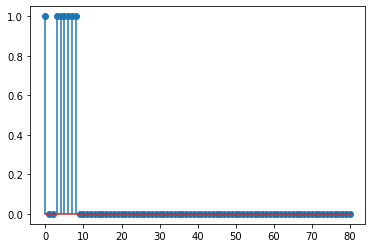

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    
    y19 = []  
    y20 = []
    y21 = []
    y22 = []
    y23 = []
    y24 = []
    y25 = []
    y26 = []
    
    xz11 = []
    xz12 = []
    
    xzs11 = []
    xzs12 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y19.append(x[-19,:])                
        y20.append(x[-20,:])
        y21.append(x[-21,:])       # Displacement    
        y22.append(x[-22,:])
        y23.append(x[-23,:])       # Displacement             
        y24.append(x[-24,:])
        y25.append(x[-25,:])                
        y26.append(x[-26,:])

        
        zint11 = x[-21, 0:-1]        # Velocity
        xfinal11 = x[-21, 1:] 
        xmz11 = (xfinal11 - zint11)
        
        zint12 = x[-23, 0:-1]       # Velocity
        xfinal12 = x[-23, 1:] 
        xmz12 = (xfinal12 - zint12) 

        xz11.append(xmz11)
        xz12.append(xmz12)
        
        xmzsq11 = np.multiply(xmz11, xmz11)
        xzs11.append(xmzsq11)
        
        xmzsq12 = np.multiply(xmz12, xmz12)
        xzs12.append(xmzsq12)
        
    xz11 = pow(dt,-1)*np.mean(np.array(xz11), axis = 0)
    xz12 = pow(dt,-1)*np.mean(np.array(xz12), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs12 = pow(dt,-1)*np.mean(np.array(xzs12), axis = 0)

    y19 = np.array(y19)
    y20 = np.array(y20)
    y21 = np.array(y21)
    y22 = np.array(y22)
    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)

    time = t[0:-1]
    return xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time

In [4]:
xz11, xz12, xzs11, xzs12, y19, y20, y21, y22, y23, y24, y25, y26, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y19)):
    data = np.row_stack((y19[j,0:-1], y20[j,0:-1], y21[j,0:-1], y22[j,0:-1], y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz11
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[17.0],[19.0],[36.0],[37.0],[47.0],[58.0]]), 'Value': matlab.double([[1.994625349452847],[2997.3898078476946],[-4.0596894121445946],[-5997.742091224681],[2.0144432137445816],[3000.7661346232603],[-1.0547116883334198],[0.06918621703758918],[0.0014317868808571184],[0.25887164578270705],[-1.3121002172909069],[-0.15011188591632532]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4953.024750433845
Iteration = 1  log(Likelihood) = -4460.113719920536
Iteration = 2  log(Likelihood) = -4459.654922980354
Iteration = 3  log(Likelihood) = -4459.654312893859
Iteration = 4  log(Likelihood) = -4459.654309481471
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-9.77230369e-13,  1.36650415e+01,  7.09361014e+02, -2.36867268e+01,
       -1.43720769e+03,  1.29406807e+01,  7.42394747e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


2.010651978135515
2995.303927591743
-3.991046283337433
-5992.480161357249
2.011565108911237
2996.3421381542726


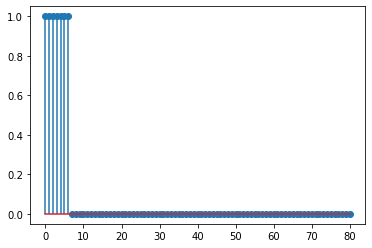

In [15]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 10

In [17]:
xdts = xz12

In [18]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[10.0],[12.0],[25.0],[34.0],[35.0],[56.0],[58.0],[70.0],[78.0],[81.0]]), 'Value': matlab.double([[2.0947562301891995],[3002.303157061329],[-3.9335191417010056],[-6002.806203541559],[2.0265727102756466],[2996.855785126185],[0.047042920776786463],[0.01137534571845723],[-0.1255988884166305],[-0.005407371619823657],[-0.22010065225687234],[-0.009606439452144464],[0.20209545515724933],[-0.0028363828214667966],[0.03867282519695779],[11.549612913779638]])}


In [19]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1.]


In [20]:
# D_std = np.std(D[:,1:],axis = 0)
# D_std1 = D_std.reshape(1,-1)
# D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4999.229836346845
Iteration = 1  log(Likelihood) = -4487.506287887264
Iteration = 2  log(Likelihood) = -4486.514663370136
Iteration = 3  log(Likelihood) = -4486.514050084728
Iteration = 4  log(Likelihood) = -4486.5140466553985
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 9.19843657e-13,  0.00000000e+00,  0.00000000e+00,  1.18055434e+01,
        7.18840101e+02, -2.57034633e+01, -1.48505479e+03,  1.35071885e+01,
        7.58746589e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  

C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_6936/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9891507455464754
2997.225156924738
-3.9954768388570536
-5993.755010355408
1.9979328203945448
2996.4422466945043


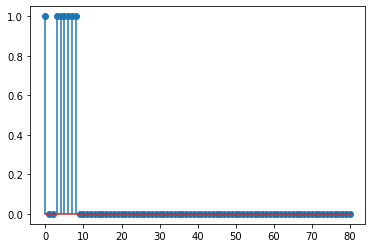

In [21]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y23 = []
    y24 = []
    y25 = []
    y26 = []
    y27 = []
    y28 = []
    y29 = []
    y30 = []
    
    xz13 = []
    xz14 = []
    
    xzs13 = []
    xzs14 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y23.append(x[-23,:])                
        y24.append(x[-24,:])
        y25.append(x[-25,:])         # Displacement      
        y26.append(x[-26,:])
        y27.append(x[-27,:])         # Displacement       
        y28.append(x[-28,:])
        y29.append(x[-29,:])                
        y30.append(x[-30,:])

        
        zint13 = x[-25, 0:-1]        # Velocity
        xfinal13 = x[-25, 1:] 
        xmz13 = (xfinal13 - zint13)
        
        zint14 = x[-27, 0:-1]        # Velocity
        xfinal14 = x[-27, 1:] 
        xmz14 = (xfinal14 - zint14) 

        xz13.append(xmz13)
        xz14.append(xmz14)
        
        xmzsq13 = np.multiply(xmz13, xmz13)
        xzs13.append(xmzsq13)
        
        xmzsq14 = np.multiply(xmz14, xmz14)
        xzs14.append(xmzsq14)
        
    xz13 = pow(dt,-1)*np.mean(np.array(xz13), axis = 0)
    xz14 = pow(dt,-1)*np.mean(np.array(xz14), axis = 0)

    xzs13 = pow(dt,-1)*np.mean(np.array(xzs13), axis = 0)
    xzs14 = pow(dt,-1)*np.mean(np.array(xzs14), axis = 0)

    y23 = np.array(y23)
    y24 = np.array(y24)
    y25 = np.array(y25)
    y26 = np.array(y26)
    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)

    time = t[0:-1]
    return xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time

In [4]:
xz13, xz14, xzs13, xzs14, y23, y24, y25, y26, y27, y28, y29, y30, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y23)):
    data = np.row_stack((y23[j,0:-1], y24[j,0:-1], y25[j,0:-1], y26[j,0:-1], y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz13
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[16.0],[21.0],[24.0],[41.0],[50.0],[51.0],[54.0],[80.0]]), 'Value': matlab.double([[2.0494177709605625],[2999.5208222694428],[-3.973132414038348],[-6000.241308422703],[2.0673863626717743],[3000.6117374653804],[0.032185509489896354],[-0.23441800290747386],[-0.00038022529537210594],[-0.12907590797748886],[-0.004037861593118605],[0.02023941498377549],[-0.007232801914751861],[-0.03153903480120698]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -5009.347187318642
Iteration = 1  log(Likelihood) = -4504.779384790374
Iteration = 2  log(Likelihood) = -4503.712999958495
Iteration = 3  log(Likelihood) = -4503.712393358336
Iteration = 4  log(Likelihood) = -4503.7123899657845
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-7.51012648e-13,  1.27696020e+01,  7.39934102e+02, -2.70217577e+01,
       -1.51675913e+03,  1.23805397e+01,  7.53546664e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  

C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.994151369277238
2996.4682007949355
-4.008009864622892
-5994.161063061209
1.9737644876973743
2997.002237861422


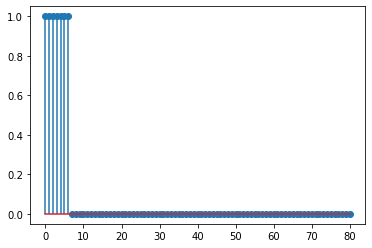

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 8

In [16]:
xdts = xz14

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[14.0],[19.0],[41.0],[50.0],[52.0],[69.0],[77.0],[80.0]]), 'Value': matlab.double([[1.9948326308230002],[3000.2440507069778],[-4.03680022247471],[-5998.896421590446],[2.0229549581926616],[3001.244773539589],[0.019170846525850334],[0.13270665801793],[0.04569823721204426],[0.006056402735104848],[0.00207608565838798],[-0.08061220889115954],[-2.9906168799353163],[-0.2271498449270689]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0.]


In [19]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -5010.782963728218
Iteration = 1  log(Likelihood) = -4505.678241979479
Iteration = 2  log(Likelihood) = -4505.471681365512
Iteration = 3  log(Likelihood) = -4505.471057861159
Iteration = 4  log(Likelihood) = -4505.471054372712
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 4.71210834e-13,  0.00000000e+00,  0.00000000e+00,  1.35726850e+01,
        7.58231736e+02, -2.50151758e+01, -1.50666259e+03,  1.22936353e+01,
        7.65065986e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_1856/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


2.0131723478710017
2996.496308680628
-3.9880382130431014
-5992.291368239411
1.9961713333240416
2995.8048619707147


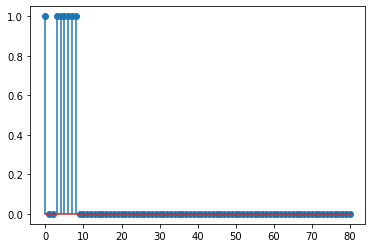

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y27 = []
    y28 = []
    y29 = []
    y30 = []
    y31 = []
    y32 = []
    y33 = []
    y34 = []
    
    xz15 = []
    xz16 = []
    
    xzs15 = []
    xzs16 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y27.append(x[-27,:])               
        y28.append(x[-28,:])
        y29.append(x[-29,:])         # Displacement     
        y30.append(x[-30,:])
        y31.append(x[-31,:])         # Displacement       
        y32.append(x[-32,:])
        y33.append(x[-33,:])               
        y34.append(x[-34,:])

        
        zint15 = x[-29, 0:-1]        # Velocity
        xfinal15 = x[-29, 1:] 
        xmz15 = (xfinal15 - zint15)
        
        zint16 = x[-31, 0:-1]        # Velocity
        xfinal16 = x[-31, 1:] 
        xmz16 = (xfinal16 - zint16) 

        xz15.append(xmz15)
        xz16.append(xmz16)
        
        xmzsq15 = np.multiply(xmz15, xmz15)
        xzs15.append(xmzsq15)
        
        xmzsq16 = np.multiply(xmz16, xmz16)
        xzs16.append(xmzsq16)
        
    xz15 = pow(dt,-1)*np.mean(np.array(xz15), axis = 0)
    xz16 = pow(dt,-1)*np.mean(np.array(xz16), axis = 0)

    xzs15 = pow(dt,-1)*np.mean(np.array(xzs15), axis = 0)
    xzs16 = pow(dt,-1)*np.mean(np.array(xzs16), axis = 0)

    y27 = np.array(y27)
    y28 = np.array(y28)
    y29 = np.array(y29)
    y30 = np.array(y30)
    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)

    time = t[0:-1]
    return xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time

In [4]:
xz15, xz16, xzs15, xzs16, y27, y28, y29, y30, y31, y32, y33, y34, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y27)):
    data = np.row_stack((y27[j,0:-1], y28[j,0:-1], y29[j,0:-1], y30[j,0:-1], y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz15
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[18.0],[24.0],[58.0],[74.0]]), 'Value': matlab.double([[2.049437029315179],[2999.369395117641],[-3.993238339587459],[-5998.389282307299],[1.9866534152148765],[2999.99967241746],[-0.0017327477004483653],[-0.005471157566450552],[-0.06921224233674853],[-0.1421577433242704]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -5001.694071143888
Iteration = 1  log(Likelihood) = -4510.804038961567
Iteration = 2  log(Likelihood) = -4510.642745422739
Iteration = 3  log(Likelihood) = -4510.642151358862
Iteration = 4  log(Likelihood) = -4510.642148036632
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 9.96167935e-13,  1.24909875e+01,  7.54285792e+02, -2.46601199e+01,
       -1.52868016e+03,  1.21541607e+01,  7.48703303e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9834191248660422
2994.1484681705238
-3.997373785900647
-5987.325660253337
1.9942890233748591
2992.521744769699


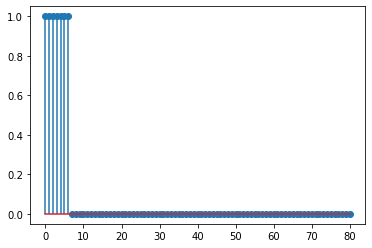

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 6

In [16]:
xdts = xz16

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[23.0],[26.0],[30.0],[45.0],[51.0],[55.0],[72.0],[81.0]]), 'Value': matlab.double([[1.989960534374894],[2997.559441866198],[-3.9813919137547282],[-5996.423202945348],[2.0743646870405423],[2995.789629028581],[0.1983466644568848],[-0.06768348551470409],[-0.04828973636853769],[2.496479415094337],[0.035026262242237656],[0.09452385465079714],[-0.007815610767826709],[8.248921888494484]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [19]:
X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4993.578079408978
Iteration = 1  log(Likelihood) = -4492.480280774636
Iteration = 2  log(Likelihood) = -4490.852506815375
Iteration = 3  log(Likelihood) = -4490.851877296838
Iteration = 4  log(Likelihood) = -4490.851873775895
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-1.12105754e-12,  0.00000000e+00,  0.00000000e+00,  1.22495049e+01,
        7.64133192e+02, -2.42335155e+01, -1.49803805e+03,  1.15308729e+01,
        7.06298552e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_2308/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.98562902096774
2992.852521317974
-3.9763036937142964
-5987.567329167563
1.9988779200040339
2994.566374614491


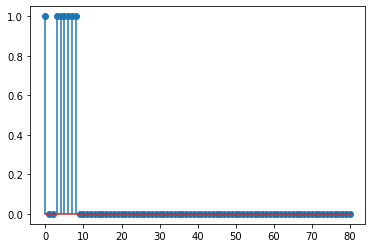

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y31 = []
    y32 = []
    y33 = []
    y34 = []
    y35 = []
    y36 = []
    y37 = []
    y38 = []
    
    xz17 = []
    xz18 = []
    
    xzs17 = []
    xzs18 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y31.append(x[-31,:])            
        y32.append(x[-32,:])
        y33.append(x[-33,:])         # Displacement     
        y34.append(x[-34,:])
        y35.append(x[-35,:])         # 
        y36.append(x[-36,:])              
        y37.append(x[-37,:])
        y38.append(x[-38,:])
        
        zint17 = x[-33, 0:-1]        # Velocity
        xfinal17 = x[-33, 1:] 
        xmz17 = (xfinal17 - zint17)
        
        zint18 = x[-35, 0:-1]        # Velocity
        xfinal18 = x[-35, 1:] 
        xmz18 = (xfinal18 - zint18) 

        xz17.append(xmz17)
        xz18.append(xmz18)
        
        xmzsq17 = np.multiply(xmz17, xmz17)
        xzs17.append(xmzsq17)
        
        xmzsq18 = np.multiply(xmz18, xmz18)
        xzs18.append(xmzsq18)
        
    xz17 = pow(dt,-1)*np.mean(np.array(xz17), axis = 0)
    xz18 = pow(dt,-1)*np.mean(np.array(xz18), axis = 0)

    xzs17 = pow(dt,-1)*np.mean(np.array(xzs17), axis = 0)
    xzs18 = pow(dt,-1)*np.mean(np.array(xzs18), axis = 0)

    y31 = np.array(y31)
    y32 = np.array(y32)
    y33 = np.array(y33)
    y34 = np.array(y34)
    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)

    time = t[0:-1]
    return xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time

In [4]:
xz17, xz18, xzs17, xzs18, y31, y32, y33, y34, y35, y36, y37, y38, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y31)):
    data = np.row_stack((y31[j,0:-1], y32[j,0:-1], y33[j,0:-1], y34[j,0:-1], y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz17
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[20.0],[24.0],[38.0],[64.0]]), 'Value': matlab.double([[0.1327206429295249],[2.03076883879684],[2999.5610665844565],[-3.966499962328691],[-5998.5685426496575],[2.03348613175562],[2999.307780589279],[-0.005133986589619265],[0.0021209127271544616],[-0.00650790874627794],[0.10693922364577096]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4924.787682778619
Iteration = 1  log(Likelihood) = -4439.767347109235
Iteration = 2  log(Likelihood) = -4439.603644851051
Iteration = 3  log(Likelihood) = -4439.603043480268
Iteration = 4  log(Likelihood) = -4439.603040117511
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-1.22655939e-13,  1.22279987e+01,  7.49175191e+02, -2.31450491e+01,
       -1.41233283e+03,  1.21189528e+01,  6.61732968e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


2.0064045864978093
2994.4078519404666
-4.012196463914909
-5988.012296609312
2.0060507756250177
2993.4584411061032


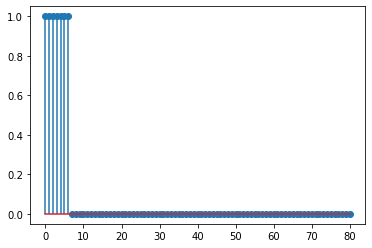

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 4

In [16]:
xdts = xz18

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[34.0],[51.0],[54.0],[64.0],[66.0],[68.0]]), 'Value': matlab.double([[1.9641123435919152],[2999.241097852081],[-3.945098074225355],[-5998.117774977731],[1.9955128872469095],[2997.114553245255],[0.007462414121757794],[-0.23871030169919955],[-0.0009161980234586679],[0.21912689427719875],[-0.003113388172250321],[0.00926530653233056]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# D_std = np.std(D[:,1:],axis = 0)
# D_std1 = D_std.reshape(1,-1)
# D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4856.555408200613
Iteration = 1  log(Likelihood) = -4370.005190690524
Iteration = 2  log(Likelihood) = -4369.840624820847
Iteration = 3  log(Likelihood) = -4369.840017882637
Iteration = 4  log(Likelihood) = -4369.840014488239
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 1.99904675e-13,  0.00000000e+00,  0.00000000e+00,  1.15596740e+01,
        7.06521210e+02, -2.42268980e+01, -1.32409978e+03,  1.03912939e+01,
        5.81073323e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_10284/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


2.003870581443681
2995.5104018460484
-4.010279460375954
-5989.784169905727
1.9864022322107955
2992.599722524427


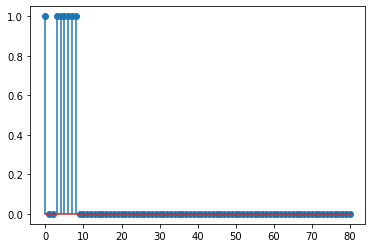

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            

        y35.append(x[-35,:])        
        y36.append(x[-36,:])              
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])        
        y42.append(x[-42,:])

        
        zint19 = x[-37, 0:-1]        # Velocity
        xfinal19 = x[-37, 1:] 
        xmz19 = (xfinal19 - zint19)
        
        zint20 = x[-39, 0:-1]        # Velocity
        xfinal20 = x[-39, 1:] 
        xmz20 = (xfinal20 - zint20) 

        xz19.append(xmz19)
        xz20.append(xmz20)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)
        
        xmzsq20 = np.multiply(xmz20, xmz20)
        xzs20.append(xmzsq20)
        
    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)
    xz20 = pow(dt,-1)*np.mean(np.array(xz20), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)
    xzs20 = pow(dt,-1)*np.mean(np.array(xzs20), axis = 0)

    y35 = np.array(y35)
    y36 = np.array(y36)
    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time

In [4]:
xz19, xz20, xzs19, xzs20, y35, y36, y37, y38, y39, y40, y41, y42, time = M_DOF_sys(x_initial, dof, T)

In [5]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y35)):
    data = np.row_stack((y35[j,0:-1], y36[j,0:-1], y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [6]:
xdts = xz19
D = Dictionary

In [8]:
Dict = D.reshape(-1,order='F')
Dict.shape

(81000,)

In [9]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[10.0],[38.0],[44.0],[47.0],[54.0],[64.0]]), 'Value': matlab.double([[2.000564784558737],[2997.8212896979835],[-4.011590205953798],[-5998.379063195677],[2.115898690991753],[3000.0135842037985],[0.007111123655417825],[0.0016679669589331728],[0.17778107710784996],[0.04522603182106566],[-0.008349634701657779],[-0.08297073766518616]])}


In [10]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4735.66030943075
Iteration = 1  log(Likelihood) = -4259.629557718762
Iteration = 2  log(Likelihood) = -4258.230011445454
Iteration = 3  log(Likelihood) = -4258.229402824751
Iteration = 4  log(Likelihood) = -4258.2293994192405
{'zmean': array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 4.07890781e-13,  1.20518610e+01,  6.62852012e+02, -2.10767531e+01,
       -1.16479728e+03,  1.20413084e+01,  5.11401232e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.993968333712578
2992.438811087823
-4.022797352850086
-5987.074654692968
2.0278642439463197
2993.568082947166


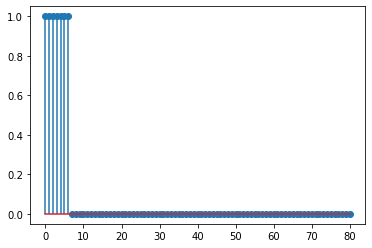

In [14]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 2

In [16]:
xdts = xz20

In [17]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[9.0],[28.0],[37.0],[52.0],[55.0]]), 'Value': matlab.double([[2.058755292210478],[3004.94541786472],[-4.019263261253092],[-6008.31534068137],[2.0428020894751784],[3005.6667271850747],[-0.1009072292748944],[-0.1432976911282043],[0.002333514399514003],[-0.14040808863021295]])}


In [18]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# D_std = np.std(D[:,1:],axis = 0)
# D_std1 = D_std.reshape(1,-1)
# D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4574.617812344398
Iteration = 1  log(Likelihood) = -4115.756949622766
Iteration = 2  log(Likelihood) = -4115.59510144681
Iteration = 3  log(Likelihood) = -4115.5945072635595
Iteration = 4  log(Likelihood) = -4115.59450393966
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([-5.44537535e-13,  0.00000000e+00,  0.00000000e+00,  1.04584261e+01,
        5.83222156e+02, -2.37926443e+01, -1.02380237e+03,  1.15169988e+01,
        3.65385986e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.

C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_12764/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9961389992338232
2997.770203503636
-4.006894532350776
-5992.989301531508
2.0280011684999084
2991.9358537257626


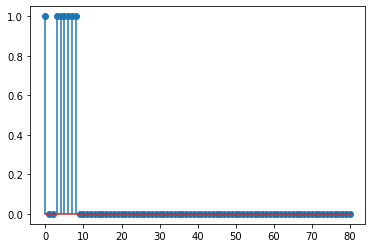

In [20]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# Drift 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    mu = 1
    g = 9.81
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 100 # no. of samples in the run

    y35 = []
    y36 = []
    y37 = []
    y38 = []
    y39 = []
    y40 = []
    y41 = []
    y42 = []
    
    xz19 = []
    xz20 = []
    
    xzs19 = []
    xzs20 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
                         
        y37.append(x[-37,:])         # 
        y38.append(x[-38,:])
        y39.append(x[-39,:])         #
        y40.append(x[-40,:])
        y41.append(x[-41,:])         #
        y42.append(x[-42,:])

        
        zint19 = x[-41, 0:-1]        # Velocity
        xfinal19 = x[-41, 1:] 
        xmz19 = (xfinal19 - zint19)
        

        xz19.append(xmz19)
        
        xmzsq19 = np.multiply(xmz19, xmz19)
        xzs19.append(xmzsq19)

    xz19 = pow(dt,-1)*np.mean(np.array(xz19), axis = 0)

    xzs19 = pow(dt,-1)*np.mean(np.array(xzs19), axis = 0)

    y37 = np.array(y37)
    y38 = np.array(y38)
    y39 = np.array(y39)
    y40 = np.array(y40)
    y41 = np.array(y41)
    y42 = np.array(y42)

    time = t[0:-1]
    return xz19, xzs19, y37, y38, y39, y40, y41, y42, time

In [4]:
xz19, xzs19, y37, y38, y39, y40, y41, y42, time = M_DOF_sys(x_initial, dof, T)

In [6]:
# Expected Dictionary Creation:
libr = []
for j in range(len(y37)):
    data = np.row_stack((y37[j,0:-1], y38[j,0:-1], y39[j,0:-1], y40[j,0:-1], y41[j,0:-1], y42[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)

In [7]:
xdts = xz19
D = Dictionary

In [8]:
D.shape

(1000, 49)

In [9]:
Dict = D.reshape(-1,order='F')
Dict.shape

(49000,)

In [10]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[4.0],[5.0],[6.0],[7.0],[8.0],[14.0],[26.0]]), 'Value': matlab.double([[1.9663477802059508],[3000.6737711944907],[-3.9901048331316575],[-6000.570244137786],[0.0055544960354988885],[-0.0023514422380917677],[0.0031435219827562278]])}


In [11]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [13]:
D_std = np.std(D[:,1:],axis = 0)
D_std1 = D_std.reshape(1,-1)
D1 = D*np.diag(1/D_std1)

X = D1[:,1:]
y = xdts
initz0 = initz0[1:]
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = -4040.708162255054
Iteration = 1  log(Likelihood) = -3774.5641575789573
Iteration = 2  log(Likelihood) = -3774.5083554238363
Iteration = 3  log(Likelihood) = -3774.5082989448465
{'zmean': array([1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'wmean': array([ 5.07573224e-14,  0.00000000e+00,  0.00000000e+00,  1.16878253e+01,
        5.10606379e+02, -2.26618683e+01, -7.32137100e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0

C:\Users\USER\AppData\Local\Temp/ipykernel_8020/2372790283.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8020/2372790283.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_8020/2372790283.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
C:\Users\USER\AppData\Local\Temp/ipykernel_8020/2372790283.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
C:\Users\USER\AppData\Local\Temp/ipykernel_8020/2372790283.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))


1.9710619223855972
2998.6391100391693
-3.984083429356548
-5998.5450813651705


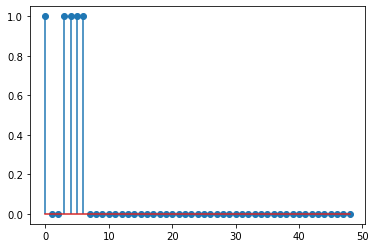

In [15]:
plt.stem(DS['zmean'])   

for i in DS["modelIdx"]:
    print((((DS["wmean"][1:]) / (D_std))).reshape(-1)[i])

# True Prediction

In [1]:
import numpy as np
import pickle 

Nsamp = 10000
dt = 0.001
T = 3
dof = 21
t = np.arange(0, T+dt, dt)
dW = np.sqrt(dt)*np.random.randn(Nsamp, t.shape[0], 2*dof)

pickle.dump(dW, open('Forcing_Term_MDOF.p', 'wb'))

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 1
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    y7 = []
    y8 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            '''LINEAR PART DRIFT'''
            A = drift_mat(dof,k,c,m)
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
        y1.append(x[-1,:])   
        y2.append(x[-2,:])      

    y1 = np.array(y1)
    y2 = np.array(y2)

    return y1, y2

In [3]:
np.random.seed(1)
T = 3
dof = 21
x_initial = np.zeros(2*dof)

In [4]:
import time 
start = time.time()
y1, y2 = M_DOF_sys(x_initial, dof, T)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

ensemble  :  0
ensemble  :  10
ensemble  :  20
ensemble  :  30
ensemble  :  40
ensemble  :  50
ensemble  :  60
ensemble  :  70
ensemble  :  80
ensemble  :  90
ensemble  :  100
ensemble  :  110
ensemble  :  120
ensemble  :  130
ensemble  :  140
ensemble  :  150
ensemble  :  160
ensemble  :  170
ensemble  :  180
ensemble  :  190
ensemble  :  200
ensemble  :  210
ensemble  :  220
ensemble  :  230
ensemble  :  240
ensemble  :  250
ensemble  :  260
ensemble  :  270
ensemble  :  280
ensemble  :  290
ensemble  :  300
ensemble  :  310
ensemble  :  320
ensemble  :  330
ensemble  :  340
ensemble  :  350
ensemble  :  360
ensemble  :  370
ensemble  :  380
ensemble  :  390
ensemble  :  400
ensemble  :  410
ensemble  :  420
ensemble  :  430
ensemble  :  440
ensemble  :  450
ensemble  :  460
ensemble  :  470
ensemble  :  480
ensemble  :  490
ensemble  :  500
ensemble  :  510
ensemble  :  520
ensemble  :  530
ensemble  :  540
ensemble  :  550
ensemble  :  560
ensemble  :  570
ensemble  :  580
ensemble

ensemble  :  4620
ensemble  :  4630
ensemble  :  4640
ensemble  :  4650
ensemble  :  4660
ensemble  :  4670
ensemble  :  4680
ensemble  :  4690
ensemble  :  4700
ensemble  :  4710
ensemble  :  4720
ensemble  :  4730
ensemble  :  4740
ensemble  :  4750
ensemble  :  4760
ensemble  :  4770
ensemble  :  4780
ensemble  :  4790
ensemble  :  4800
ensemble  :  4810
ensemble  :  4820
ensemble  :  4830
ensemble  :  4840
ensemble  :  4850
ensemble  :  4860
ensemble  :  4870
ensemble  :  4880
ensemble  :  4890
ensemble  :  4900
ensemble  :  4910
ensemble  :  4920
ensemble  :  4930
ensemble  :  4940
ensemble  :  4950
ensemble  :  4960
ensemble  :  4970
ensemble  :  4980
ensemble  :  4990
ensemble  :  5000
ensemble  :  5010
ensemble  :  5020
ensemble  :  5030
ensemble  :  5040
ensemble  :  5050
ensemble  :  5060
ensemble  :  5070
ensemble  :  5080
ensemble  :  5090
ensemble  :  5100
ensemble  :  5110
ensemble  :  5120
ensemble  :  5130
ensemble  :  5140
ensemble  :  5150
ensemble  :  5160
ensemble  

ensemble  :  9180
ensemble  :  9190
ensemble  :  9200
ensemble  :  9210
ensemble  :  9220
ensemble  :  9230
ensemble  :  9240
ensemble  :  9250
ensemble  :  9260
ensemble  :  9270
ensemble  :  9280
ensemble  :  9290
ensemble  :  9300
ensemble  :  9310
ensemble  :  9320
ensemble  :  9330
ensemble  :  9340
ensemble  :  9350
ensemble  :  9360
ensemble  :  9370
ensemble  :  9380
ensemble  :  9390
ensemble  :  9400
ensemble  :  9410
ensemble  :  9420
ensemble  :  9430
ensemble  :  9440
ensemble  :  9450
ensemble  :  9460
ensemble  :  9470
ensemble  :  9480
ensemble  :  9490
ensemble  :  9500
ensemble  :  9510
ensemble  :  9520
ensemble  :  9530
ensemble  :  9540
ensemble  :  9550
ensemble  :  9560
ensemble  :  9570
ensemble  :  9580
ensemble  :  9590
ensemble  :  9600
ensemble  :  9610
ensemble  :  9620
ensemble  :  9630
ensemble  :  9640
ensemble  :  9650
ensemble  :  9660
ensemble  :  9670
ensemble  :  9680
ensemble  :  9690
ensemble  :  9700
ensemble  :  9710
ensemble  :  9720
ensemble  

In [6]:
pickle.dump(y2, open('MDOF_actual_relia.p', 'wb'))

# Estimated value prediction

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


# open pickle file

file_data = "Forcing_Term_MDOF.p"
fileobj_data = open(file_data, 'rb')
Forcing_term = pickle.load(fileobj_data)

dW = np.array(Forcing_term)

In [2]:
reverse_arr = [
[-1.9856578360681794
,-2999.1054873824546
,2.000594188269195
,2999.421070107903]
,
[1.9993880674656803
,2998.751240420418
,-4.004425002532981
,-5998.559737234919
,1.983354401651775
,2999.9804929627767]

,
[1.996019659650603
,2998.1820045623476
,-3.987879225886737
,-5995.060773070505
,1.9985362835677112
,2996.4584540504925]
,

[1.9923740734765514
,2996.245771840961
,-4.003049477280969
,-5992.0037657290295
,2.0103310724543872
,2995.17468795253]
,

[1.9903495270787748
,2998.0981101181233
,-3.994933600084622
,-5996.061077113376
,1.9677395409015634
,2998.1635345032882]

,
[2.0184651208568294
,2998.6859393507852
,-4.013114574041832
,-5999.281885073903
,2.0082113462257722
,3000.7909039506276]

,
[2.0315832268965677
,2998.1430900690357
,-4.0125547137838815
,-5995.891507106089
,2.0348119808240726
,2997.396188667701]

,
[1.9858062831074283
,2996.759148055798
,-3.9835494379162357
,-5994.755364268647
,2.0080597987567144
,2997.543372325106]

,
[1.979841912935129
,2997.5049710046123
,-3.97780877166546
,-5996.012284491217
,1.9838493670140263
,2998.373479074605]

,
[1.9833756187404543
,2998.0413562761296
,-3.9941528472406467
,-5995.655950234483
,2.0060493894186107
,2998.14921073922
 ]
,
[2.010651978135515
,2995.303927591743
,-3.991046283337433
,-5992.480161357249
,2.011565108911237
,2996.3421381542726]

,
[1.9891507455464754
,2997.225156924738
,-3.9954768388570536
,-5993.755010355408
,1.9979328203945448
,2996.4422466945043]
,

[1.994151369277238
,2996.4682007949355
,-4.008009864622892
,-5994.161063061209
,1.9737644876973743
,2997.002237861422]
,
[2.0131723478710017
,2996.496308680628
,-3.9880382130431014
,-5992.291368239411
,1.9961713333240416
,2995.8048619707147]
,

[1.9834191248660422
,2994.1484681705238
,-3.997373785900647
,-5987.325660253337
,1.9942890233748591
,2992.521744769699]

,
[1.98562902096774
,2992.852521317974
,-3.9763036937142964
,-5987.567329167563
,1.9988779200040339
,2994.566374614491]
,
[2.0064045864978093
,2994.4078519404666
,-4.012196463914909
,-5988.012296609312
,2.0060507756250177
,2993.4584411061032]
,
[2.003870581443681
,2995.5104018460484
,-4.010279460375954
,-5989.784169905727
,1.9864022322107955
,2992.599722524427]
,
[1.993968333712578
,2992.438811087823
,-4.022797352850086
,-5987.074654692968
,2.0278642439463197
,2993.568082947166]
,
[1.9961389992338232
,2997.770203503636
,-4.006894532350776
,-5992.989301531508
,2.0280011684999084
,2991.9358537257626]
,
[1.9710619223855972
,2998.6391100391693
,-3.984083429356548
,-5998.5450813651705]
    
]

In [3]:
theta = []

for i in range(20, -1, -1):
    theta.append(reverse_arr[i])

In [4]:
def drift_mat(dof, Theta):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    p = 0
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    
        elif(i==dim-1):
            A[i][i] = Theta[p][0]
            A[i][i-1] = Theta[p][1]
            A[i][i-2] = Theta[p][2]
            A[i][i-3] = Theta[p][3]
            p += 1
            
        else:
            A[i][i-3] = Theta[p][5]
            A[i][i-2] = Theta[p][4]
            A[i][i-1] = Theta[p][3]
            A[i][i] = Theta[p][2]
            A[i][i+1] = Theta[p][1]
            A[i][i+2] = Theta[p][0]
            p += 1
    return A

In [6]:
import numpy as np
dof = 21
A = drift_mat(dof, theta)

In [7]:
diff_arr_iden = [1.003,1.00, 0.994,0.99,0.987,0.995,0.993,0.991,0.991,0.992,0.989,0.993,0.997,1.00,0.997,0.991,1.02,0.995,0.994,0.99,1.02]

In [8]:
'''DIFFUSION TERM  = b'''
diffu_arr = np.zeros(2*dof)
q = 0
for i in range(2*dof):
    if (i%2 != 0):
        diffu_arr[i] = diff_arr_iden[q]
        q += 1

In [11]:
def M_DOF_sys(x_initial, T, A, diffu_arr):
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.001
    t = np.arange(0, T+dt, dt)
    Nsamp = 10000  # no. of samples in the run
    y2 = []
    # Simulation Starts Here :
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0       
        if ensemble%10==0:
            print('ensemble  : ',ensemble)
        for n in range(len(t)-1):
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW[ensemble][i]    
            x0 = soln_arr
            x = np.column_stack((x, x0))
             
        y2.append(x[-2,:])      
    y2 = np.array(y2)
    return  y2

In [12]:
import time 
start = time.time()
T = 3
dof = 21
x_initial = np.zeros(2*dof)

y2 = M_DOF_sys(x_initial, T, A, diffu_arr)
end = time.time()
print('Total time : ', (end-start)/60, '  min')

ensemble  :  0
ensemble  :  10
ensemble  :  20
ensemble  :  30
ensemble  :  40
ensemble  :  50
ensemble  :  60
ensemble  :  70
ensemble  :  80
ensemble  :  90
ensemble  :  100
ensemble  :  110
ensemble  :  120
ensemble  :  130
ensemble  :  140
ensemble  :  150
ensemble  :  160
ensemble  :  170
ensemble  :  180
ensemble  :  190
ensemble  :  200
ensemble  :  210
ensemble  :  220
ensemble  :  230
ensemble  :  240
ensemble  :  250
ensemble  :  260
ensemble  :  270
ensemble  :  280
ensemble  :  290
ensemble  :  300
ensemble  :  310
ensemble  :  320
ensemble  :  330
ensemble  :  340
ensemble  :  350
ensemble  :  360
ensemble  :  370
ensemble  :  380
ensemble  :  390
ensemble  :  400
ensemble  :  410
ensemble  :  420
ensemble  :  430
ensemble  :  440
ensemble  :  450
ensemble  :  460
ensemble  :  470
ensemble  :  480
ensemble  :  490
ensemble  :  500
ensemble  :  510
ensemble  :  520
ensemble  :  530
ensemble  :  540
ensemble  :  550
ensemble  :  560
ensemble  :  570
ensemble  :  580
ensemble

ensemble  :  4620
ensemble  :  4630
ensemble  :  4640
ensemble  :  4650
ensemble  :  4660
ensemble  :  4670
ensemble  :  4680
ensemble  :  4690
ensemble  :  4700
ensemble  :  4710
ensemble  :  4720
ensemble  :  4730
ensemble  :  4740
ensemble  :  4750
ensemble  :  4760
ensemble  :  4770
ensemble  :  4780
ensemble  :  4790
ensemble  :  4800
ensemble  :  4810
ensemble  :  4820
ensemble  :  4830
ensemble  :  4840
ensemble  :  4850
ensemble  :  4860
ensemble  :  4870
ensemble  :  4880
ensemble  :  4890
ensemble  :  4900
ensemble  :  4910
ensemble  :  4920
ensemble  :  4930
ensemble  :  4940
ensemble  :  4950
ensemble  :  4960
ensemble  :  4970
ensemble  :  4980
ensemble  :  4990
ensemble  :  5000
ensemble  :  5010
ensemble  :  5020
ensemble  :  5030
ensemble  :  5040
ensemble  :  5050
ensemble  :  5060
ensemble  :  5070
ensemble  :  5080
ensemble  :  5090
ensemble  :  5100
ensemble  :  5110
ensemble  :  5120
ensemble  :  5130
ensemble  :  5140
ensemble  :  5150
ensemble  :  5160
ensemble  

ensemble  :  9180
ensemble  :  9190
ensemble  :  9200
ensemble  :  9210
ensemble  :  9220
ensemble  :  9230
ensemble  :  9240
ensemble  :  9250
ensemble  :  9260
ensemble  :  9270
ensemble  :  9280
ensemble  :  9290
ensemble  :  9300
ensemble  :  9310
ensemble  :  9320
ensemble  :  9330
ensemble  :  9340
ensemble  :  9350
ensemble  :  9360
ensemble  :  9370
ensemble  :  9380
ensemble  :  9390
ensemble  :  9400
ensemble  :  9410
ensemble  :  9420
ensemble  :  9430
ensemble  :  9440
ensemble  :  9450
ensemble  :  9460
ensemble  :  9470
ensemble  :  9480
ensemble  :  9490
ensemble  :  9500
ensemble  :  9510
ensemble  :  9520
ensemble  :  9530
ensemble  :  9540
ensemble  :  9550
ensemble  :  9560
ensemble  :  9570
ensemble  :  9580
ensemble  :  9590
ensemble  :  9600
ensemble  :  9610
ensemble  :  9620
ensemble  :  9630
ensemble  :  9640
ensemble  :  9650
ensemble  :  9660
ensemble  :  9670
ensemble  :  9680
ensemble  :  9690
ensemble  :  9700
ensemble  :  9710
ensemble  :  9720
ensemble  

In [14]:
pickle.dump(y2, open('MDOF_Final_relia_dt_0.001_T_3_sec.p', 'wb'))

# Reliability

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Actual data

file_data = "MDOF_actual_relia.p"
fileobj_data = open(file_data, 'rb')
MDOF = pickle.load(fileobj_data)

output = MDOF
output = np.array(output)

In [2]:
file_data_F = 'MDOF_Final_relia_dt_0.001_T_3_sec.p' # Prediction data
fileobj_data_F = open(file_data_F, 'rb')
MDOF_F = pickle.load(fileobj_data_F)

output_F = MDOF_F
output_F = np.array(output_F)

## Y1 Actual

In [10]:
output.shape

(10000, 3001)

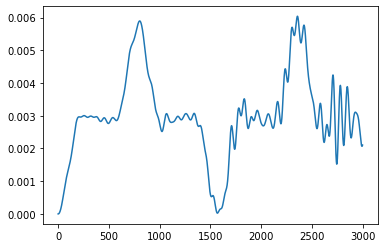

In [3]:
plt.plot(np.mean(output, axis=0))

In [ ]:
threshold = 2.5
ensem = output.shape[0]
time = output.shape[1] 

import matplotlib.pyplot as plt

idx = [np.where(output[i,:]>threshold) for i in range(ensem)]
# idx
count = 0 
for i in idx:
    if len(i[0]) != 0:
        count += 1
print("Probability of Failure :", count/ensem)


ans = []
for i in idx:
    if len(i[0])!=0:
        ans.append((i[0][0])/100)
    else:
        ans.append(time/100)
        
plt.hist(ans, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1 = set() 
prob_fail_1 = []


for i in range(time):
    
    colmn = output[:, i]
    ans = np.where(colmn > threshold)
    for i in ans[0]:
        pf_count_per_t_1.add(i)
    
    no_of_fail_1 = len(pf_count_per_t_1)
    prob_fail_1.append(no_of_fail_1/ensem)
    
    
final_pf = []
for i in range(len(prob_fail_1)):
    if i%100==0:
        final_pf.append(prob_fail_1[i])

plt.plot(final_pf,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()


ensem_F = output_F.shape[0]
time_F = output_F.shape[1] 


idx_F = [np.where(output_F[i,:]> threshold) for i in range(ensem_F)]
# idx
count_F = 0 
for i in idx_F:
    if len(i[0]) != 0:
        count_F += 1
        
print("Probability of Failure :", count_F/ensem_F)


ans_F = []
for i in idx_F:
    if len(i[0])!=0:
        ans_F.append((i[0][0])/100)
    else:
        ans_F.append(time_F/100)
        
plt.hist(ans_F, density=True)
plt.xlabel('time in Sec')
plt.ylabel('Number of Failure')
plt.show()


pf_count_per_t_1_F = set() 
prob_fail_1_F = []


for i in range(time_F):
    
    colmn_F = output_F[:, i]
    ans_F = np.where(colmn_F > threshold)
    for i in ans_F[0]:
        pf_count_per_t_1_F.add(i)
    
    no_of_fail_1_F = len(pf_count_per_t_1_F)
    prob_fail_1_F.append(no_of_fail_1_F/ensem_F)
    
    
final_pf_F = []
for i in range(len(prob_fail_1_F)):
    if i%100==0:
        final_pf_F.append(prob_fail_1_F[i])
    
plt.plot(prob_fail_1_F,color='green',linewidth=3)
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.show()

plt.plot(prob_fail_1='green',linewidth=3, label='Actual')
plt.plot(prob_fail_1_F,color='red',linewidth=3, label='Final')
plt.xlabel('time')
plt.ylabel('Probability of failure')
plt.legend()
plt.show()
plt.figure()

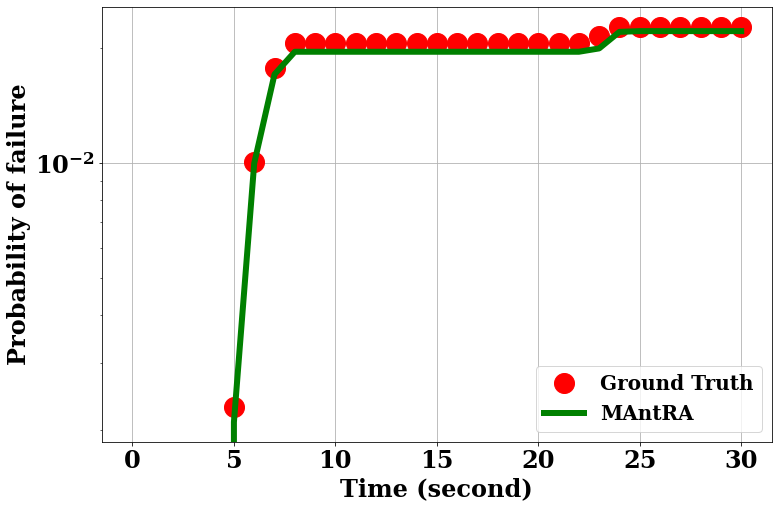

In [203]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 24
plt.figure(figsize = (12,8 ))
plt.semilogy(final_pf, 'ro', label="Ground Truth", markersize=20)
plt.semilogy(final_pf_F,color='green' ,linewidth=6, label="MAntRA")
plt.xlabel('Time (second)',fontweight='bold')
plt.ylabel('Probability of failure',fontweight='bold')
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
plt.legend(prop={'weight':'bold','size': 20},loc=4)
plt.grid()
plt.savefig('reliability Mdofx.pdf')
plt.show()